## Observations and Insights 

In [525]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

In [526]:
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
df_group = df['Drug Regimen'].groupby(df['Mouse ID'])
#df_group.value_counts()

In [527]:
# Checking the number of mice.
num_mice = len(df['Mouse ID'].unique())
num_mice

249

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [528]:
#duplicate row filter
dup_mouse = df.duplicated(subset=['Mouse ID', 'Timepoint']) 

In [529]:
#add true false colomn based on duplicate row filter. 
df['Is Duplicate'] = dup_mouse
df_dup_mouse_data = df[df['Is Duplicate']== True]

In [530]:
#id duplicate
dup_mouse_id = df_dup_mouse_data['Mouse ID'].unique()[0]
dup_mouse_id

'g989'

# Optional: Get all the data for the duplicate mouse ID. 

In [531]:
df_dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Duplicate
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [532]:
# drop the duplicate 
clean_df = df[df['Mouse ID'] != dup_mouse_id]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Is Duplicate
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,f932,0,45.000000,0,Ketapril,Male,15,29,False
2,g107,0,45.000000,0,Ketapril,Female,2,29,False
3,a457,0,45.000000,0,Ketapril,Female,11,30,False
4,c819,0,45.000000,0,Ketapril,Male,21,25,False
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,False
1889,u364,45,31.023923,3,Capomulin,Male,18,17,False
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,False
1891,x773,45,58.634971,4,Placebo,Female,21,30,False


# Checking the number of mice in the clean DataFrame.

In [533]:
len(clean_df['Mouse ID'].unique())


248

## Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [534]:
tumor_grp = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']) 
#tumor_grp.describe()

In [535]:
#turn drug regimen to list so I can add to summery table
drug_reg = clean_df['Drug Regimen'].unique()
drug_reg.sort()
#drug_reg

In [536]:
# Assemble the resulting series into a single summary dataframe.
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#dictionary for summary table
stats = {'Drug Regimen': list(drug_reg),
        'Mean': list(tumor_grp.mean()),
        'Median': list(tumor_grp.median()),
        'Variance': list(tumor_grp.var()),
        'Standard Deviation': list(tumor_grp.std()),
        'SEM': list(tumor_grp.sem())}
#summary data table
stats_df = pd.DataFrame(stats)
stats_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [537]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

#create new df - get only Mouse ID and Drug Regimen, sex cols

In [538]:
#included column for gender for later use
df_m_reg = clean_df[["Mouse ID", "Drug Regimen", "Sex"]] 
df_gen = df_m_reg
df_m_reg

,Mouse ID,Drug Regimen,Sex
0,b128,Capomulin,Female
1,f932,Ketapril,Male
2,g107,Ketapril,Female
3,a457,Ketapril,Female
4,c819,Ketapril,Male
...,...,...,...
1888,r944,Capomulin,Male
1889,u364,Capomulin,Male
1890,p438,Ceftamin,Female
1891,x773,Placebo,Female


In [539]:
##### now we have 1880 records because clean was merged with study results. get distinct mice + regimen
#df_m_reg = df_m_reg.drop_duplicates(subset=["Mouse ID", "Drug Regimen"], keep="first", inplace=False)
####new df for disticnt mice by gender
#df_m_gen = df_m_reg
#now we have distinct rows 1 to 1 relationship Mouse ID => Drug Regimen 
df_m_reg = df_m_reg.groupby('Drug Regimen', as_index=False).count() 
df_m_reg

,Drug Regimen,Mouse ID,Sex
0,Capomulin,230,230
1,Ceftamin,178,178
2,Infubinol,178,178
3,Ketapril,188,188
4,Naftisol,186,186
5,Placebo,181,181
6,Propriva,148,148
7,Ramicane,228,228
8,Stelasyn,181,181
9,Zoniferol,182,182


# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

Text(0, 0.5, 'Number of Mice')

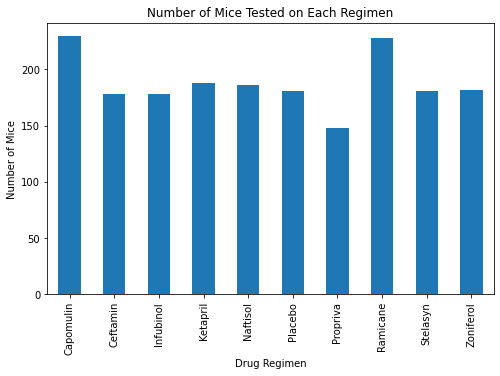

In [540]:
#with the understanding that we are measuring the total number of unique mice(248) tested on each drug regimen
df_m_reg.plot(kind='bar', x='Drug Regimen', y='Mouse ID', figsize=(8,5), legend=False)
#set titles for chart
plt.title('Number of Mice Tested on Each Regimen')
plt.ylabel('Number of Mice')

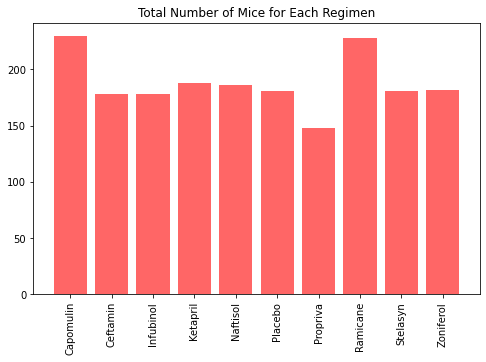

In [541]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = range(len(df_m_reg['Mouse ID']))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, df_m_reg['Mouse ID'], color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, df_m_reg['Drug Regimen'], rotation="vertical")
plt.title('Total Number of Mice for Each Regimen')
plt.show()

In [542]:
df_m_reg

,Drug Regimen,Mouse ID,Sex
0,Capomulin,230,230
1,Ceftamin,178,178
2,Infubinol,178,178
3,Ketapril,188,188
4,Naftisol,186,186
5,Placebo,181,181
6,Propriva,148,148
7,Ramicane,228,228
8,Stelasyn,181,181
9,Zoniferol,182,182


In [543]:
male_count = df_gen['Sex'].value_counts()['Male']
female_count = df_gen['Sex'].value_counts()['Female']
gender_count = [male_count, female_count]
gen_series = pd.Series(gender_count)

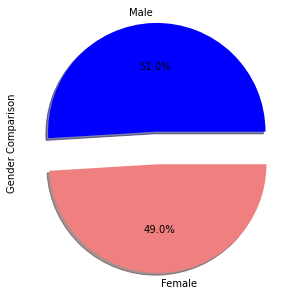

In [544]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen_series.plot(kind="pie", explode=explode, labels=['Male','Female'], colors=colors, autopct='%1.1f%%',shadow=True, figsize=(5,5), label='Gender Comparison')

(-1.1813787715661561,
 1.2604420915242418,
 -1.2007079821041444,
 1.291609007783887)

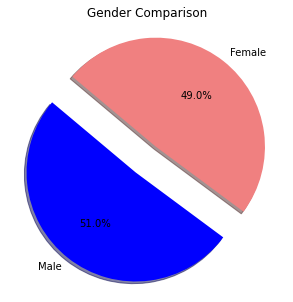

In [545]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["blue", "lightcoral"]

# Tells matplotlib to seperate the "male" section from the others
explode = (0.1, 0.2)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Gender Comparison')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [546]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 

# Start by getting the last (greatest) timepoint for each mouse
mouse_df_max_timepoint = clean_df.groupby('Mouse ID', as_index=False).max() 
#select all rows and just 2 columns
mouse_df_max_timepoint = mouse_df_max_timepoint.loc[:, ['Mouse ID', 'Timepoint']]
#send to excel for review
mouse_df_max_timepoint.to_csv("data/mouse_df_max_timepoint.csv", index=False, header=True)

In [547]:
# Merge mouse_df_max_timepoint with the original dataframe to get the tumor volume at the last timepoint
merged_mt_df = pd.merge(clean_df, mouse_df_max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner', suffixes=['','_y'])
merged_mt_df.sort_values('Timepoint', ascending=False).head(50)
merged_mt_df.to_csv("data/merged.csv", index=False, header=True)


In [548]:
#removing unneeded columns
tumor_vol_df = merged_mt_df.iloc[:,[0,1,2,3,4,5]]
tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex
0,f932,0,45.000000,0,Ketapril,Male
1,x336,0,45.000000,0,Naftisol,Female
2,h428,0,45.000000,0,Ketapril,Female
3,v199,0,45.000000,0,Naftisol,Female
4,o848,0,45.000000,0,Stelasyn,Female
...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male
244,u364,45,31.023923,3,Capomulin,Male
245,p438,45,61.433892,1,Ceftamin,Female
246,x773,45,58.634971,4,Placebo,Female


In [549]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [550]:
# Locate the rows which contain mice on each drug and get the tumor volumes
treatment_filter1 = tumor_vol_df["Drug Regimen"].isin(treatments) 
vol_by_reg_df = tumor_vol_df[treatment_filter1]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#    -- vol_by_reg_df.groupby('Drug Regimen').describe()
new_df = vol_by_reg_df['Tumor Volume (mm3)'].groupby(vol_by_reg_df["Drug Regimen"])
tumor_stats_df = new_df.describe()  
tumor_stats_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869


In [551]:
# Determine outliers using upper and lower bounds
#tumor vol stats by regimen
tumor_stats_df['IQR'] = tumor_stats_df['75%'] - tumor_stats_df['25%']
#add lower and upper boundry
tumor_stats_df['Lower Boundry'] = tumor_stats_df['25%'] - (1.5 * tumor_stats_df['25%'])
tumor_stats_df['Upper Boundry'] = tumor_stats_df['75%'] + (1.5 * tumor_stats_df['25%'])
tumor_stats_df

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Boundry,Upper Boundry
Drug Regimen,,,,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863,-16.188678,88.725256
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752,-24.361039,137.382947
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135,-27.024304,146.598654
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537,-15.780235,87.999711


In [552]:
#plot data
vol_by_reg_df
capomulin = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ceftamin = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
infubinol = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ramicane = vol_by_reg_df.loc[vol_by_reg_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']

##### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

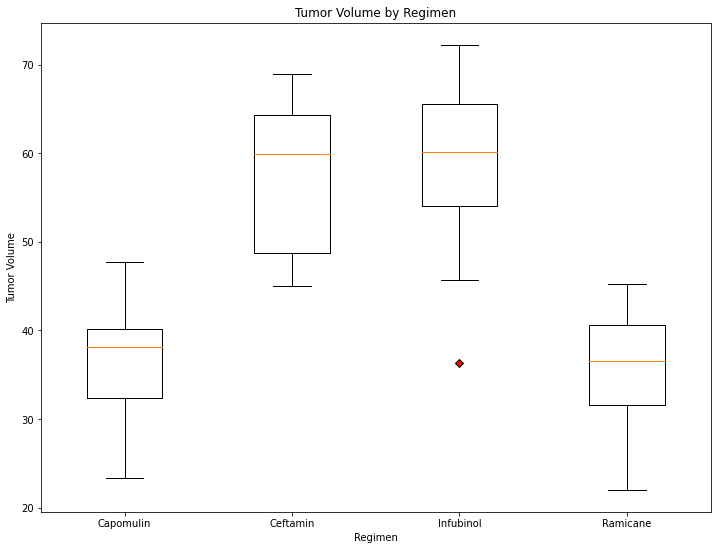

In [553]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create box plot and format results
green_diamond = dict(markerfacecolor='r', marker='D')
figs = plt.figure(figsize = (12,9))
plt.boxplot(( capomulin, ceftamin, infubinol, ramicane), flierprops=green_diamond)
plt.title('Tumor Volume by Regimen')
plt.xlabel('Regimen')
plt.xticks([1,2,3, 4],treatments)
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

In [554]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"].sort_values("Mouse ID")
mouse_df = mouse_df[mouse_df["Mouse ID"] == "b128"].sort_values('Timepoint')

In [555]:
x_axis = mouse_df['Timepoint']

In [556]:
y= mouse_df['Tumor Volume (mm3)']
y2= mouse_df['Timepoint']

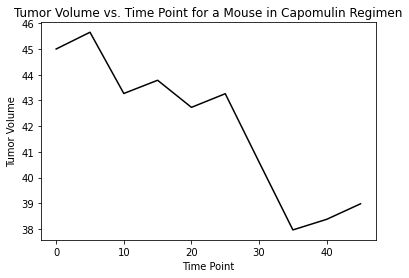

In [557]:
plt.plot(x_axis, y, color="black", label="Tumor Volume")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs. Time Point for a Mouse in Capomulin Regimen')
plt.show()

In [558]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"].sort_values("Mouse ID")
weight_grp_df = cap_df.groupby('Mouse ID', as_index=False).mean()
 
#cap_df.to_csv("data/cap_df.csv", index=False, header=True)
#avg_tv = cap_df['Tumor Volume (mm3)']
#weight_grp_df

<function matplotlib.pyplot.show(*args, **kw)>

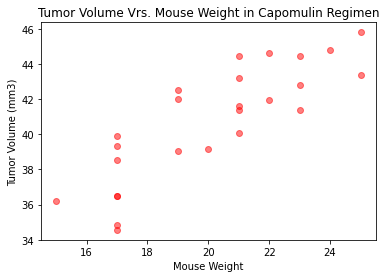

In [559]:
x_axis = weight_grp_df['Weight (g)']
tumor_vol = weight_grp_df['Tumor Volume (mm3)']
mouseweight = weight_grp_df['Weight (g)']
plt.title('Tumor Volume Vrs. Mouse Weight in Capomulin Regimen')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(mouseweight, tumor_vol, marker='o', facecolors='red', edgecolors='red', alpha=0.5)
plt.show

## Correlation and Regression

In [560]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [561]:
#correlation coefficient
correlation = st.pearsonr(tumor_vol, mouseweight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [562]:
#reshape variables 
tumor_volume = tumor_vol.values.reshape(-1, 1)
mouse_wght = mouseweight.values.reshape(-1, 1)

In [563]:
#Linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(tumor_volume, mouse_wght)
y_pred = linear_regressor.predict(tumor_volume)

<function matplotlib.pyplot.show(*args, **kw)>

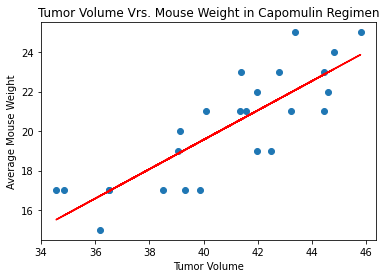

In [564]:
plt.scatter(tumor_vol, mouseweight)
plt.plot(tumor_vol, y_pred, color='red')
plt.xlabel('Tumor Volume')
plt.ylabel('Average Mouse Weight')
plt.title('Tumor Volume Vrs. Mouse Weight in Capomulin Regimen')
plt.show